# Look into relationship between rides and weather data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sqlite3
import numpy as np
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 'large'
plt.rcParams['xtick.labelsize'] = 'large'
plt.rcParams['ytick.labelsize'] = 'large'
plt.rcParams['lines.linewidth'] = 3

In [2]:
con1 = sqlite3.connect('data/citibike_database.db3')
con2 = sqlite3.connect('data/nyc_weather.db3')

In [3]:
rides = pd.read_sql_query("SELECT yday,count(*) as num_rides FROM rides WHERE year=2015 GROUP BY yday",con1)
rides.head()

,yday,num_rides
0,1,5317
1,2,11304
2,3,4478
3,4,7849
4,5,14506


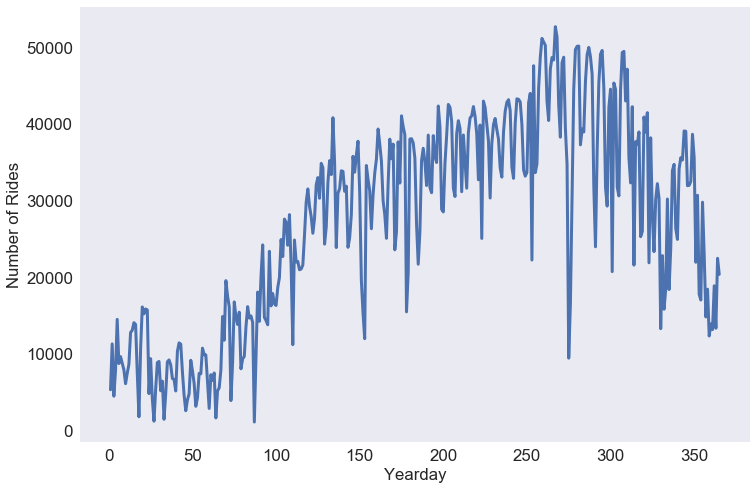

In [4]:
plt.figure(figsize=(12,8))
plt.plot(rides.yday, rides.num_rides)
plt.grid();
plt.xlabel('Yearday')
plt.ylabel('Number of Rides');

In [5]:
wea = pd.read_sql_query("SELECT * FROM temps WHERE year=2015",con2)
wea.head()


,date,st_code,max_temp,min_temp,mean_temp,year,yday,month,precip_In,cloud_cover,max_gust_mph,events
0,2015-01-01 00:00:00,KLGA,39,27,33,2015,1,1,0.00,1,31,None
1,2015-01-02 00:00:00,KLGA,42,35,39,2015,2,1,0.00,4,32,None
2,2015-01-03 00:00:00,KLGA,41,31,36,2015,3,1,0.67,7,20,Rain-Snow
3,2015-01-04 00:00:00,KLGA,57,41,49,2015,4,1,0.31,8,44,Fog-Rain
4,2015-01-05 00:00:00,KLGA,50,22,36,2015,5,1,0.00,3,49,None


In [6]:
plt.figure(figsize=(12,8))
plt.plot(wea.yday, wea.Max_TemperatureF)
plt.grid();
plt.xlabel('Yearday')
plt.ylabel('Temerature');

AttributeError: 'DataFrame' object has no attribute 'Max_TemperatureF'

Now join weather data to rides so we can plot # rides vs temperature for each day

In [ ]:
comb = pd.merge(rides,wea,on='yday')
comb.head()

In [ ]:
#plt.scatter(comb.Max_TemperatureF,comb.num_rides)
plt.figure(figsize=(12,8))
plt.scatter(comb.Mean_TemperatureF,comb.num_rides)
plt.grid();
plt.xlabel('Max temp')
plt.ylabel('# rides')

In [ ]:
plt.figure(figsize=(12,8))
sns.regplot(comb.Mean_TemperatureF,comb.num_rides)
plt.grid();
plt.xlabel('Max temp')
plt.ylabel('# rides')
plt.title('Daily Number of rides vs temperature for 2015');
plt.savefig('figures/rides_vs_temp_2015.pdf')

## Fit a linear regression using statsmodels

In [ ]:
# Fit a linear regression
import statsmodels.formula.api as smf
# create a fitted model in one line
lm = smf.ols(formula='num_rides ~Mean_TemperatureF', data=comb).fit()
# print the coefficients
lm.params

In [ ]:
lm.rsquared

In [ ]:
# plot the regression line over the data
X_new = pd.DataFrame({'Mean_TemperatureF': [comb.Mean_TemperatureF.min(), comb.Mean_TemperatureF.max()]})
X_new.head()
preds = lm.predict(X_new)
#preds

plt.figure(figsize=(12,8))
plt.scatter(comb.Mean_TemperatureF,comb.num_rides)
plt.grid();
plt.xlabel('Max temp')
plt.ylabel('# rides')

plt.plot(X_new,preds,c='red',linewidth=2)

The R^2 value is 0.62, which means that 62% of the variance in num_rides can be explained by the mean temperature.

In [ ]:
lm.rsquared

## Fit linear regression w/ sklearn

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
X = comb.Mean_TemperatureF.values.reshape(-1,1)
Y = comb.num_rides.values.reshape(-1,1)
reg.fit(X,Y)

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(comb.Mean_TemperatureF,comb.num_rides)
plt.grid();
plt.xlabel('Max temp')
plt.ylabel('# rides')
pred_X = np.array([10,90]).reshape(-1,1)
plt.plot(pred_X,reg.predict(pred_X),c='red')

In [ ]:
reg.score(X,Y)

See if other years hold similar patterns

In [ ]:
year = 2014
rides = pd.read_sql_query("SELECT yday,count(*) as num_rides FROM rides WHERE year=? GROUP BY yday",con1,params=[year])
rides.head()
wea = pd.read_sql_query("SELECT * FROM temps WHERE year=?",con2,params=[year])
wea.head()
comb = pd.merge(rides,wea,on='yday')
comb.head()

In [ ]:
plt.figure(figsize=(12,8))
sns.regplot(comb.Mean_TemperatureF,comb.num_rides)
plt.grid();
plt.xlabel('Max temp')
plt.ylabel('# rides')
plt.title('Daily Number of rides vs temperature for ' + str(year) );
#plt.savefig('figures/rides_vs_temp_2015.pdf')

In [ ]:
lm = smf.ols(formula='num_rides ~Mean_TemperatureF', data=comb).fit()
lm.rsquared